# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Example-python-code-to-read-in-ultrasound-data-and-perform-some-basic-plotting" data-toc-modified-id="Example-python-code-to-read-in-ultrasound-data-and-perform-some-basic-plotting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example python code to read in ultrasound data and perform some basic plotting</a></div>

Example python code to read in ultrasound data and perform some basic plotting
====

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure plots are shown inside the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
raw_train_data = pd.read_csv('../training_ultrasound.csv')

In [4]:
# only consider pre-birth entries
raw_train_data = raw_train_data.query('AGEDAYS < 0')

In [5]:
raw_train_data.head()

,STUDYID,SUBJID,SEXN,SEX,GAGEBRTH,BIRTHWT,BIRTHLEN,BIRTHHC,DELIVERY,PARITY,...,FEMURCM,ACAZ,BPDAZ,FLAZ,BHC_Z,BLEN_Z,BWT_Z,BWT_40,BLEN_40,BHC_40
0,1,1002,2,Female,276,3540,50.3,NaN,Category 2.0,1.0,...,7.3,0.463035,-0.237645,2.142646,NaN,0.891600,0.860470,3.614882,50.610029,NaN
3,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,6.3,-1.223773,-0.453516,1.616571,NaN,0.235298,-0.725564,3.100000,50.300000,NaN
4,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,6.3,-1.319698,-0.553987,1.495569,NaN,0.235298,-0.725564,3.100000,50.300000,NaN
5,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,7.2,-1.357285,-0.607140,1.106900,NaN,0.235298,-0.725564,3.100000,50.300000,NaN
6,1,1003,1,Male,280,3100,50.3,NaN,Category 2.0,1.0,...,7.2,-1.522721,-0.715238,0.876728,NaN,0.235298,-0.725564,3.100000,50.300000,NaN


In [6]:
raw_train_data.dtypes

STUDYID       int64
SUBJID        int64
SEXN          int64
SEX          object
GAGEBRTH      int64
BIRTHWT       int64
BIRTHLEN    float64
BIRTHHC     float64
DELIVERY     object
PARITY      float64
GRAVIDA     float64
GAGEDAYS      int64
AGEDAYS       int64
LENCM       float64
WTKG        float64
BMI         float64
HCIRCM      float64
HAZ         float64
WAZ         float64
WHZ         float64
BAZ         float64
HCAZ        float64
ABCIRCM     float64
BPDCM       float64
FEMURCM     float64
ACAZ        float64
BPDAZ       float64
FLAZ        float64
BHC_Z       float64
BLEN_Z      float64
BWT_Z       float64
BWT_40      float64
BLEN_40     float64
BHC_40      float64
dtype: object

In [7]:
import warnings
warnings.filterwarnings('ignore')

temp = raw_train_data[:].describe()

warnings.filterwarnings('default')
temp

,STUDYID,SUBJID,SEXN,GAGEBRTH,BIRTHWT,BIRTHLEN,BIRTHHC,PARITY,GRAVIDA,GAGEDAYS,...,FEMURCM,ACAZ,BPDAZ,FLAZ,BHC_Z,BLEN_Z,BWT_Z,BWT_40,BLEN_40,BHC_40
count,8076.000000,8076.000000,8076.000000,8076.000000,8076.000000,8072.000000,1188.000000,7974.000000,7974.000000,8076.000000,...,8004.000000,7873.000000,7923.000000,7887.000000,1178.000000,8060.000000,8064.000000,8064.000000,8060.000000,1178.000000
mean,1.271050,3258.695641,1.475731,274.359955,3137.435612,49.621606,33.205471,0.995360,1.662277,209.855374,...,5.428298,-0.797090,-1.118497,0.185570,-0.345182,0.342913,-0.189924,3.261372,50.143767,33.678864
std,0.444529,1316.348737,0.499442,8.366842,402.613381,1.821947,1.376856,0.539756,1.010140,51.358772,...,1.656293,1.201198,1.099156,1.034547,0.922692,0.947044,0.871258,0.360911,1.590559,1.086098
min,1.000000,1002.000000,1.000000,181.000000,720.000000,34.300000,24.400000,0.000000,1.000000,31.000000,...,0.200000,-9.089636,-6.474786,-5.466641,-3.308558,-3.292897,-2.793628,2.206470,43.184148,29.833514
25%,1.000000,2101.750000,1.000000,270.000000,2890.000000,NaN,NaN,NaN,NaN,170.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,3267.000000,1.000000,274.000000,3120.000000,NaN,NaN,NaN,NaN,224.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,4384.000000,2.000000,280.000000,3370.000000,NaN,NaN,NaN,NaN,256.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.000000,5592.000000,2.000000,294.000000,5370.000000,57.300000,36.900000,7.000000,9.000000,290.000000,...,7.900000,4.576060,3.349987,5.984496,2.219053,3.924073,4.105695,5.713087,58.243979,37.008157


In [8]:
raw_train_data.apply(lambda x: len(x.unique()))

STUDYID        2
SUBJID      2491
SEXN           2
SEX            2
GAGEBRTH      60
BIRTHWT      226
BIRTHLEN      92
BIRTHHC       40
DELIVERY       7
PARITY         7
GRAVIDA       10
GAGEDAYS     237
AGEDAYS      223
LENCM          1
WTKG           1
BMI            1
HCIRCM       293
HAZ            1
WAZ            1
WHZ            1
BAZ            1
HCAZ        3767
ABCIRCM      325
BPDCM         91
FEMURCM       79
ACAZ        4186
BPDAZ       2035
FLAZ        1656
BHC_Z        167
BLEN_Z       708
BWT_Z       1947
BWT_40      1906
BLEN_40      701
BHC_40       159
dtype: int64

In [9]:
raw_train_data['SUBJID'].value_counts().value_counts()

3     717
4     708
2     538
1     245
6     126
5      81
8      41
7      19
9      10
10      6
Name: SUBJID, dtype: int64

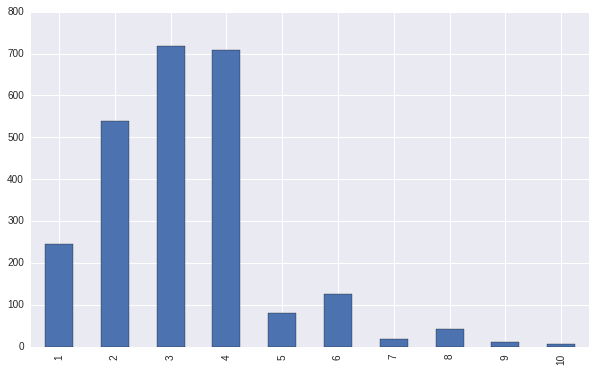

In [10]:
raw_train_data['SUBJID'].value_counts().value_counts().sort_index().plot.bar()

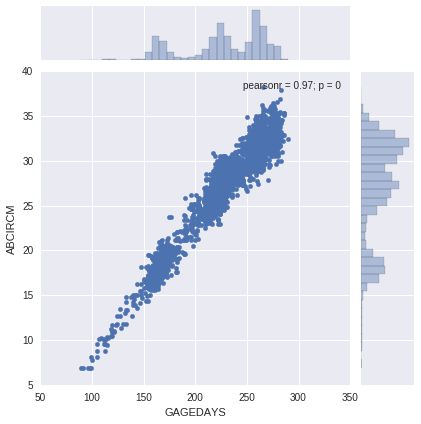

In [11]:
sns.jointplot(x='GAGEDAYS', y='ABCIRCM', data=raw_train_data[(raw_train_data.SEX == 'Male') & (raw_train_data.STUDYID == 1)])

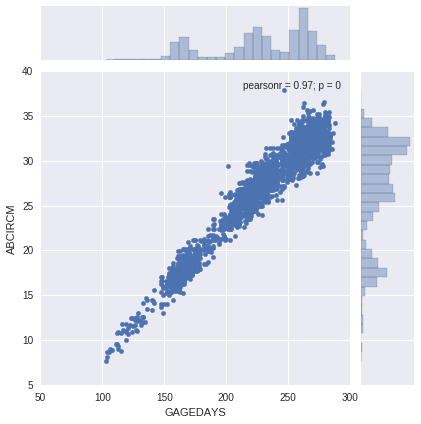

In [12]:
sns.jointplot(x='GAGEDAYS', y='ABCIRCM', data=raw_train_data[(raw_train_data.SEX == 'Female') & (raw_train_data.STUDYID == 1)])

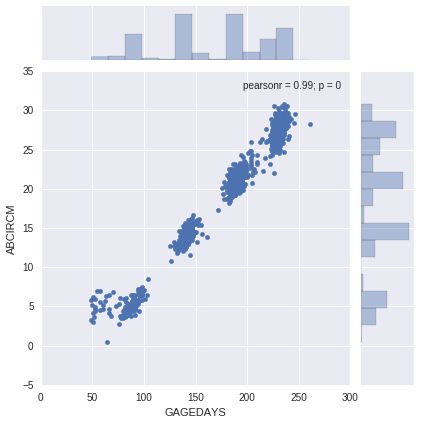

In [13]:
sns.jointplot(x='GAGEDAYS', y='ABCIRCM', data=raw_train_data[(raw_train_data.SEX == 'Male') & (raw_train_data.STUDYID == 2)])

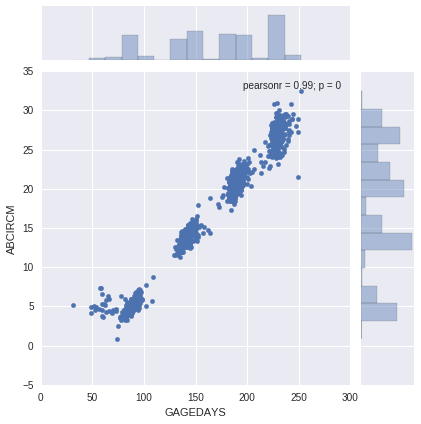

In [14]:
sns.jointplot(x='GAGEDAYS', y='ABCIRCM', data=raw_train_data[(raw_train_data.SEX == 'Female') & (raw_train_data.STUDYID == 2)])

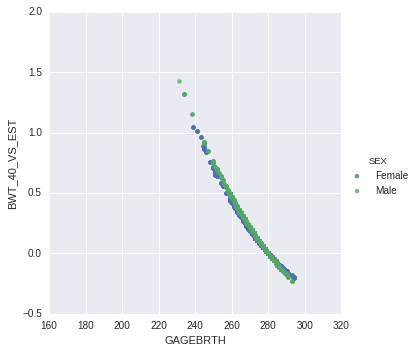

In [15]:
train_data = raw_train_data.copy()
train_data['BWT_40_VS_EST'] = raw_train_data['BWT_40'] - raw_train_data['BIRTHWT']/1000
sns.lmplot(x='GAGEBRTH', y='BWT_40_VS_EST', data=train_data, fit_reg=False, hue="SEX")

In [16]:
from sklearn.metrics import mean_squared_error
clean_data = raw_train_data[np.isfinite(raw_train_data['BWT_40'])]
mean_squared_error(clean_data['BWT_40'], clean_data['BIRTHWT']/1000)

/home/deuser/.py-virtualenvs/tf/local/lib/python2.7/site-packages/sklearn/utils/__init__.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 80
  from .murmurhash import murmurhash3_32
/home/deuser/.py-virtualenvs/tf/local/lib/python2.7/site-packages/sklearn/utils/__init__.py:10: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 144
  from .murmurhash import murmurhash3_32
/home/deuser/.py-virtualenvs/tf/local/lib/python2.7/site-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 80
  from ._logistic_sigmoid import _log_logistic_sigmoid
/home/deuser/.py-virtualenvs/tf/local/lib/python2.7/site-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 144
  from ._logistic_sigmoid import _log_logistic_sigmoid
/home/deuser/.py-virtualen

0.04472286434140265

/home/deuser/.py-virtualenvs/tf/local/lib/python2.7/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/deuser/.py-virtualenvs/tf/local/lib/python2.7/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


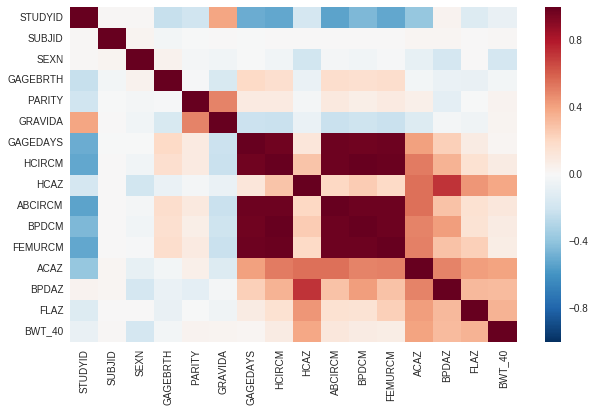

In [18]:
df = raw_train_data.drop(['LENCM','WTKG','BMI','HAZ','WAZ','WHZ','BAZ','DELIVERY','SEX', 'AGEDAYS',
                        'BIRTHLEN','BIRTHWT','BIRTHHC','BHC_Z','BLEN_Z','BWT_Z','BLEN_40','BHC_40'], axis=1)
#raw_train_data.corr()
sns.heatmap(df.corr())

In [17]:
def normalized_column(col):
  return (col - col.min()) / (col.max() - col.min())

temp_data = raw_train_data.query('AGEDAYS < 0')[["SEXN", "GAGEDAYS", "HCIRCM", "ABCIRCM", "FEMURCM", "BPDCM", "BIRTHWT"]].dropna()
temp_data["SEXN"] = normalized_column(temp_data["SEXN"])
temp_data["GAGEDAYS"] = normalized_column(temp_data["GAGEDAYS"])
temp_data["HCIRCM"] = normalized_column(temp_data["HCIRCM"])
temp_data["ABCIRCM"] = normalized_column(temp_data["ABCIRCM"])
temp_data["FEMURCM"] = normalized_column(temp_data["FEMURCM"])
temp_data["BPDCM"] = normalized_column(temp_data["BPDCM"])
temp_data["BIRTHWT"] = normalized_column(temp_data["BIRTHWT"])
print "count:", len(temp_data)
temp_data.describe()

count: 7940


,SEXN,GAGEDAYS,HCIRCM,ABCIRCM,FEMURCM,BPDCM,BIRTHWT
count,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000
mean,0.476826,0.695091,0.712574,0.635549,0.680727,0.666569,0.520015
std,0.499494,0.194359,0.187958,0.197421,0.213163,0.210038,0.086746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.544402,0.596591,0.494709,0.545455,0.522222,0.464516
50%,0.000000,0.745174,0.784091,0.690476,0.753247,0.744444,0.516129
75%,1.000000,0.868726,0.852273,0.793651,0.844156,0.822222,0.569892
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


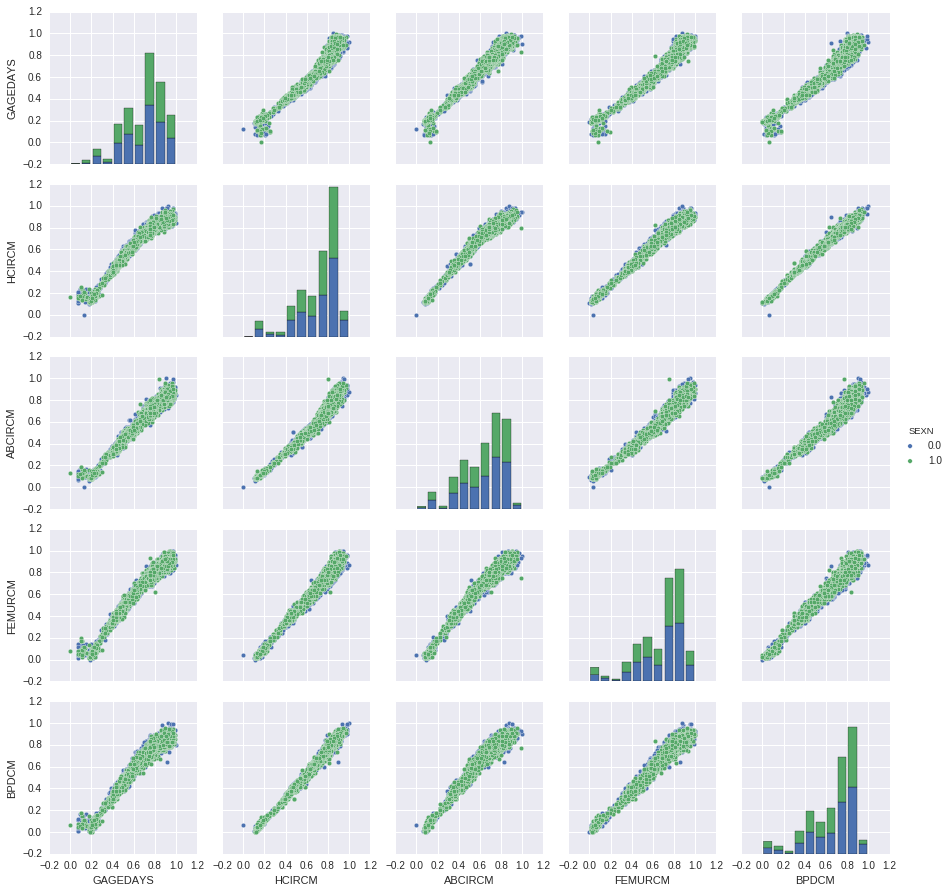

In [18]:
sns.pairplot(temp_data,
  vars=["GAGEDAYS", "HCIRCM", "ABCIRCM", "FEMURCM", "BPDCM"],
  hue="SEXN")